In [45]:
from sklearn.datasets import make_classification
import numpy as np
## we made a dataset
#  using make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,

                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=40)

In [46]:
import matplotlib.pyplot as plt

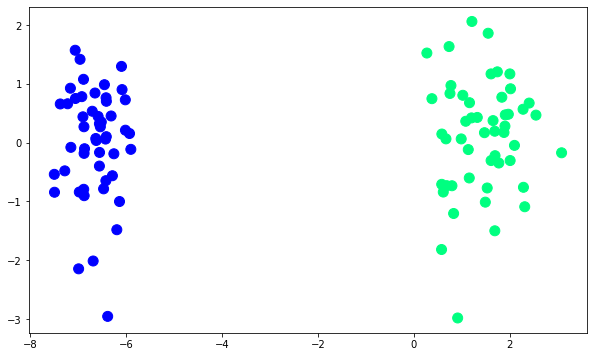

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [48]:
def perceptron(X,y):
    ## a new column for X0 where all values are set to be 1
    ## axis =1 means we want column
    ## inset(X,0,1,axis=1) means
    #  add a new column  index of that column is 0 and fill the columns every row with 1 
    X = np.insert(X,0,1,axis=1)
    ## initialize the weights or coefs with one
    ## X is a 2d np array so i need how many cols are there
    # thats why X.shape[1] is used
    weights = np.ones(X.shape[1])
    # learning rate 
    lr = 0.1
    # here  1000 is the epochs
    for i in range(1000):
        ## 100 is our row size or can use X.shape[0]
        j = np.random.randint(0,100)
        ## jth column having dot product with weights
        # sigmoid giving us the probabilistic intuition
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [49]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [50]:
intercept_,coef_ = perceptron(X,y)

In [51]:
print(coef_)
print(intercept_)

[2.2287083  0.28040651]
2.2683514731700365


In [52]:
# converting the line into y = mx + b format
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [53]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

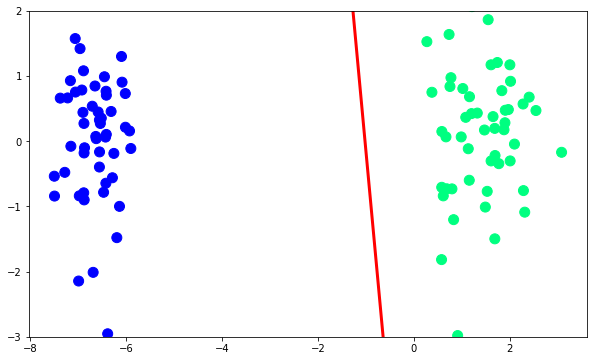

In [54]:
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [55]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [56]:

m,b = perceptron(X,y)

In [57]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import HTML


In [58]:


fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
HTML(anim.to_jshtml())

<IPython.core.display.Javascript object>

In [59]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [60]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [61]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

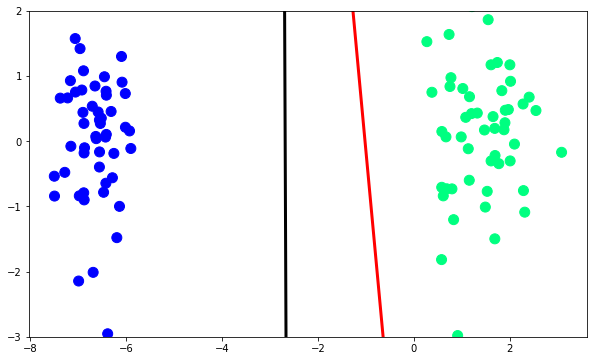

In [62]:
%matplotlib inline

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
# black line is the library predicted line
# red line is our predicted line